In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# ËÆÄÂèñ CSV Êñá‰ª∂
df = pd.read_csv('/Users/ccit0915/Desktop/kaggle/ÂÆ¢Êà∂ÊµÅÂ§±È†êÊ∏¨/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8')
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [8]:
print(df.isnull().sum())
print(df.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

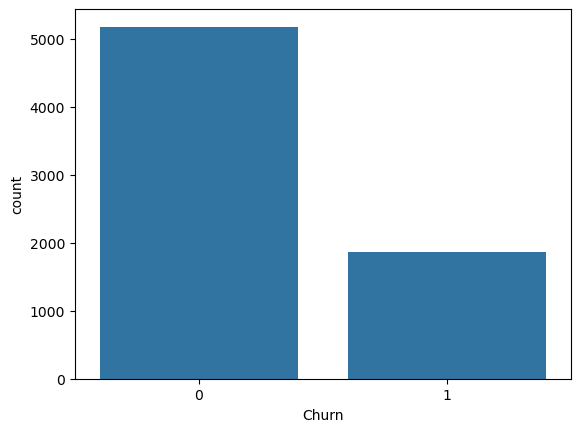

In [10]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
sns.countplot(x='Churn', data=df)
plt.show()

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.drop(columns=['customerID'], inplace=True)

In [14]:
import pandas as pd

# ÈúÄË¶ÅËΩâÊèõÁöÑ‰∫åÂÖÉÁâπÂæµ
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies"]

# Áµ±‰∏Ä "No internet service" ÁÇ∫ "No"
df[binary_cols] = df[binary_cols].replace("No internet service", "No")

# **‰ΩøÁî® replace() ËΩâÊèõ Yes/NoÔºåÈ°ØÂºè‰ΩøÁî® astype(int) ‰æÜÁ¢∫‰øùÊï∏ÊìöÈ°ûÂûã**
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)

# **‰øÆÊ≠£ÊÄßÂà•ËΩâÊèõ**
df["gender"] = df["gender"].map({"Male": 1, "Female": 0}).astype(int)

# **‰øÆÊ≠£ MultipleLinesÔºàÈ°ØÂºèËΩâÊèõÂûãÂà•Ôºâ**
df["MultipleLines"] = df["MultipleLines"].replace(
    {"No": 0, "Yes": 1, "No phone service": 0}
).astype(int)

# **ËΩâÊèõ TotalCharges ÁÇ∫Êï∏ÂÄºÔºå‰∏¶Â°´Ë£ú NaN**
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)
pd.set_option('future.no_silent_downcasting', True)

# **Ê™¢Êü•ËΩâÊèõÁµêÊûú**
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_25031/722192512.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)
/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_25031/722192512.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace(


In [16]:
# Êü•ÁúãÊØèÂÄãÈ°ûÂà•ÁâπÂæµÁöÑÂîØ‰∏ÄÂÄº
for col in ["InternetService", "Contract", "PaymentMethod"]:
    print(f"{col} ÁöÑÂîØ‰∏ÄÂÄºÔºö")
    print(df[col].unique())
    print("-" * 50)

InternetService ÁöÑÂîØ‰∏ÄÂÄºÔºö
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Contract ÁöÑÂîØ‰∏ÄÂÄºÔºö
['Month-to-month' 'One year' 'Two year']
--------------------------------------------------
PaymentMethod ÁöÑÂîØ‰∏ÄÂÄºÔºö
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------------------------------------


In [18]:
# ÈÄ≤Ë°å One-Hot Encoding
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# Ê™¢Êü•ËΩâÊèõÁµêÊûú
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0                        F

In [20]:
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0              29.85         29.85      0                        False   
1              56.95       1889.50      0                        False   
2              53.85        108.15      1                        False   
3              42.30       1840.75      0                        False   
4              70.70        151.65      1                         True   
...              ...           ...    ...                          ...   
7038           84.80       1990.50      0                        False   
7039          103.20       7362.90      0                         True   
7040           29.60        346.45      0                        False   
7041           74.40        306.60      1                         True   
7042          105.65       6844.50      0                         True   

      InternetService_No  Contract_One year  Contract_Two year  \
0                  False              False              False   
1                  False               True              False   
2                  False              False              False   
3                  False               True              False   
4                  False              False              False   
...                  ...                ...                ...   
7038               False               True              False   
7039               False               True              False   
7040               False              False              False   
7041               False              False              False   
7042               False              False               True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1                                     False                           False   
2                                     False                           False   
3                                     False                           False   
4                                     False                            True   
...                                     ...     

In [22]:
# ËΩâÊèõÂ∏ÉÊûóÂÄºÁÇ∫Êï¥Êï∏
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool', 'uint8']).columns})

# Ê™¢Êü•ËΩâÊèõÁµêÊûú
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0                         

In [24]:
print(df.isnull().sum())  # È°ØÁ§∫ÊØèÂÄãÊ¨Ñ‰ΩçÁöÑ NaN Êï∏Èáè

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

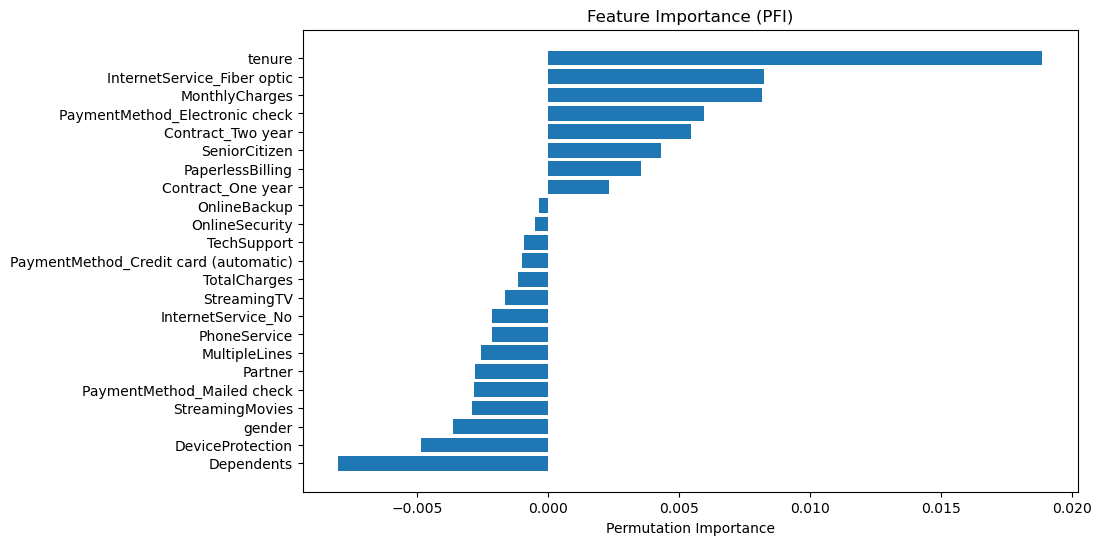

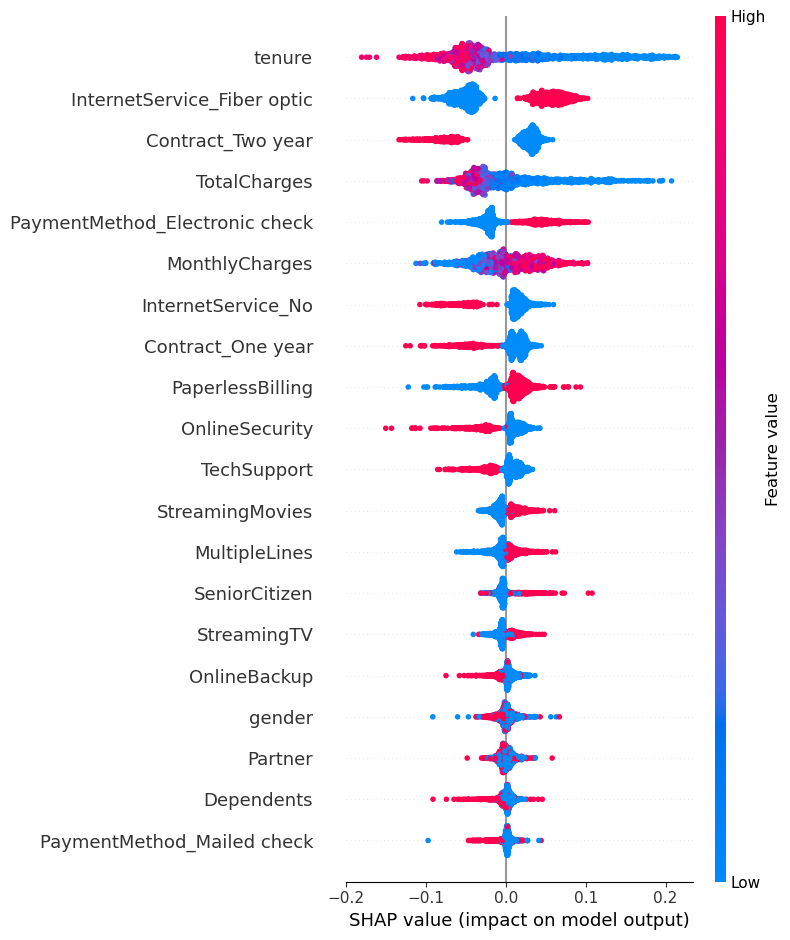

In [26]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# ËÆÄÂèñÊï∏Êìö
X = df.drop(columns=['Churn'])  # ÁâπÂæµËÆäÊï∏
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂàÜË≥áÊñô
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥ Random Forest Ê®°Âûã
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ë®àÁÆó PFIÔºàPermutation Feature ImportanceÔºâ
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# ÊéíÂ∫è PFI ÈáçË¶ÅÊÄß
sorted_idx = pfi_result.importances_mean.argsort()

# Áπ™Ë£Ω PFI Ê¢ùÂΩ¢Âúñ
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], pfi_result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (PFI)")
plt.show()

# Ë®àÁÆó SHAP ÂÄº
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values[:,:,1], X_test)

In [27]:
#Âª∫Á´ãBaseline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = rf.predict(X_test)

# Ë®àÁÆóÂêÑÁ®ÆË©ï‰º∞ÊåáÊ®ô
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (all features) Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Reduced Model (all features) Performance:
Accuracy: 0.7935
Precision: 0.6519
Recall: 0.4718
F1 Score: 0.5474


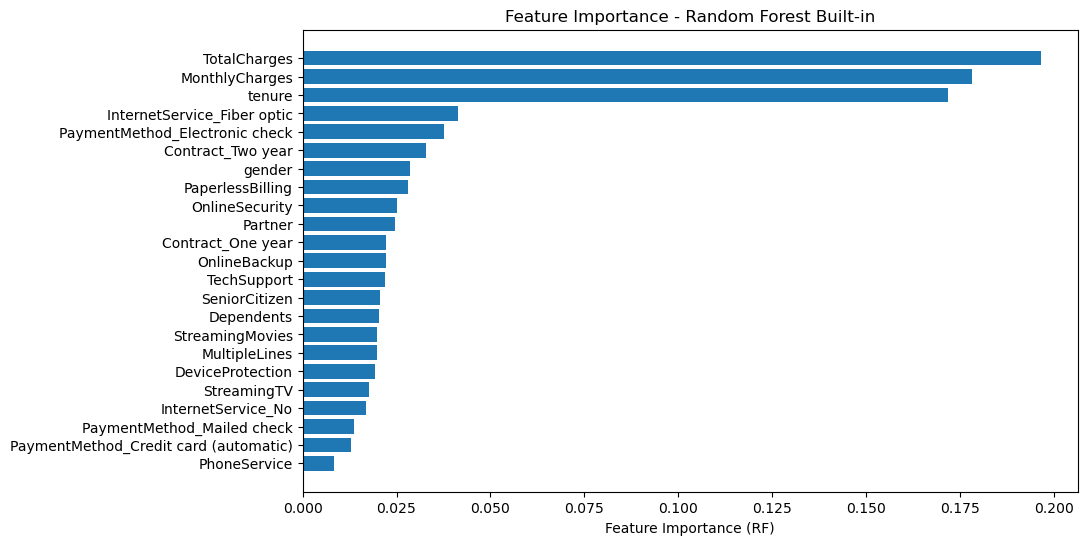

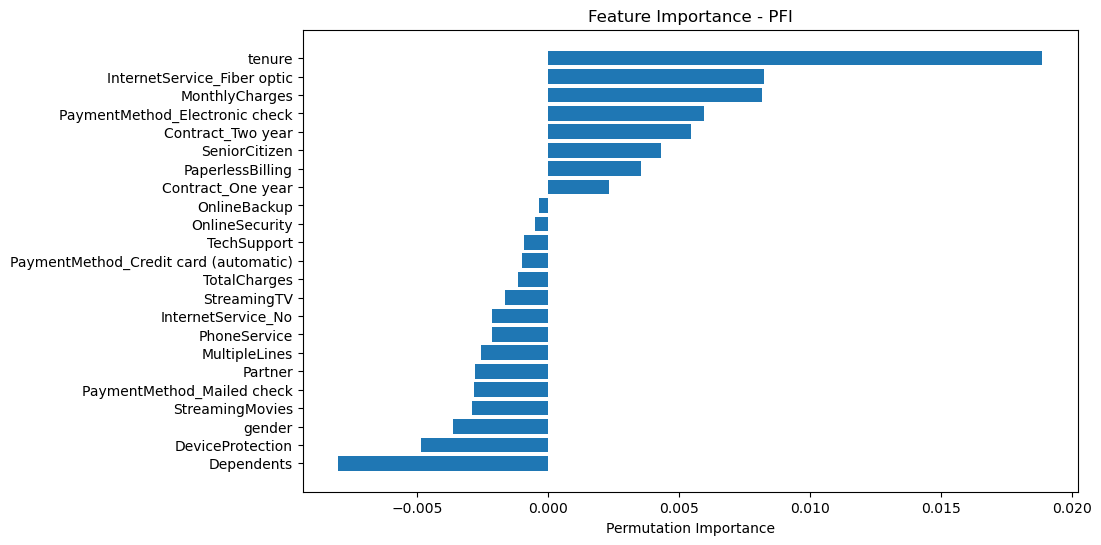

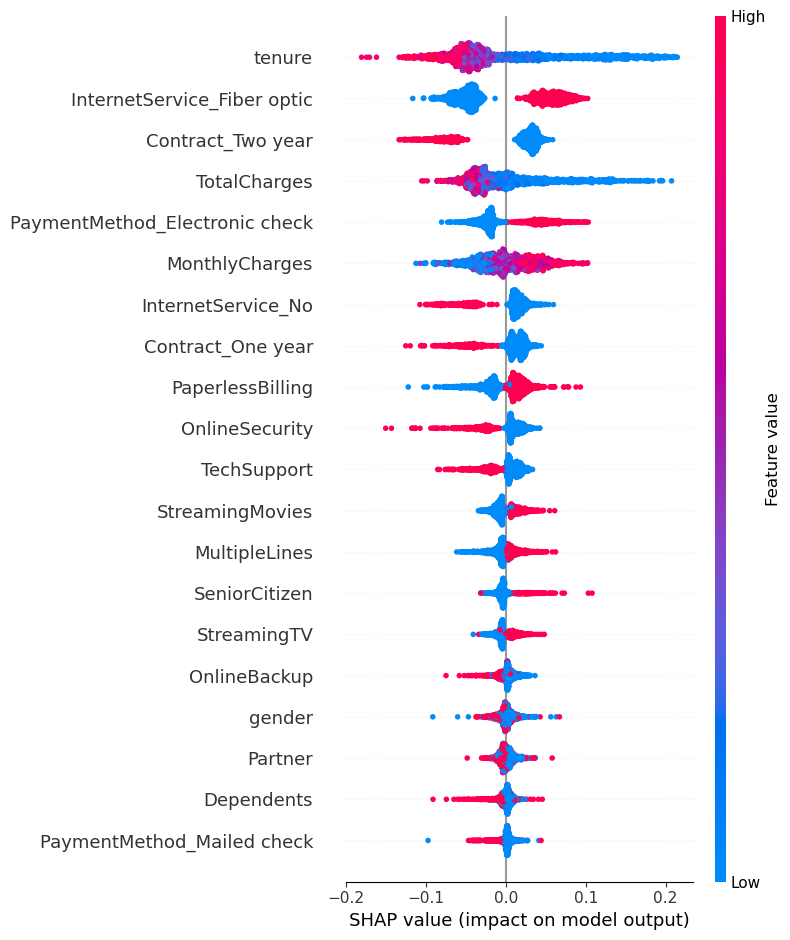

In [28]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# ËÆÄÂèñÊï∏Êìö
X = df.drop(columns=['Churn'])  # ÁâπÂæµËÆäÊï∏
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂàÜË≥áÊñô
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥ Random Forest Ê®°Âûã
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 1Ô∏è‚É£ Random Forest ÂÖßÂª∫ÁâπÂæµÈáçË¶ÅÊÄß
rf_importance = rf.feature_importances_
rf_sorted_idx = np.argsort(rf_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[rf_sorted_idx], rf_importance[rf_sorted_idx])
plt.xlabel("Feature Importance (RF)")
plt.title("Feature Importance - Random Forest Built-in")
plt.show()

# 2Ô∏è‚É£ PFIÔºàPermutation Feature ImportanceÔºâ
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
pfi_sorted_idx = pfi_result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[pfi_sorted_idx], pfi_result.importances_mean[pfi_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - PFI")
plt.show()

# 3Ô∏è‚É£ SHAP ÂÄºË®àÁÆóËàáÁπ™Âúñ
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:,:,1], X_test)

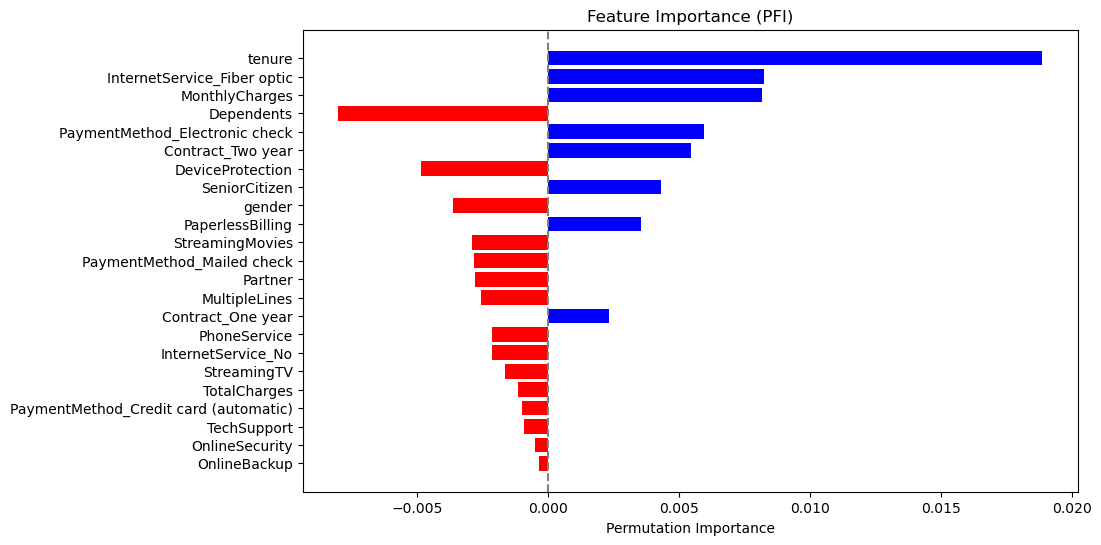

In [29]:
# Ë®àÁÆó PFIÔºàPermutation Feature ImportanceÔºâ
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# ‰æùÁÖßÁµïÂ∞çÂÄºÊéíÂ∫èÔºå‰ΩÜ‰øùÁïôÊ≠£Ë≤†ÊñπÂêëË≥áË®ä
sorted_idx = np.argsort(np.abs(pfi_result.importances_mean))

# Áπ™Ë£Ω PFI Ê¢ùÂΩ¢Âúñ
plt.figure(figsize=(10, 6))
colors = ['red' if val < 0 else 'blue' for val in pfi_result.importances_mean[sorted_idx]]  # Ë≤†ÂÄºÁ¥ÖËâ≤ÔºåÊ≠£ÂÄºËóçËâ≤
plt.barh(X.columns[sorted_idx], pfi_result.importances_mean[sorted_idx], color=colors)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (PFI)")
plt.axvline(0, color='gray', linestyle='dashed')  # Âú® 0 Ëª∏Áπ™Ë£ΩËôõÁ∑ö
plt.show()

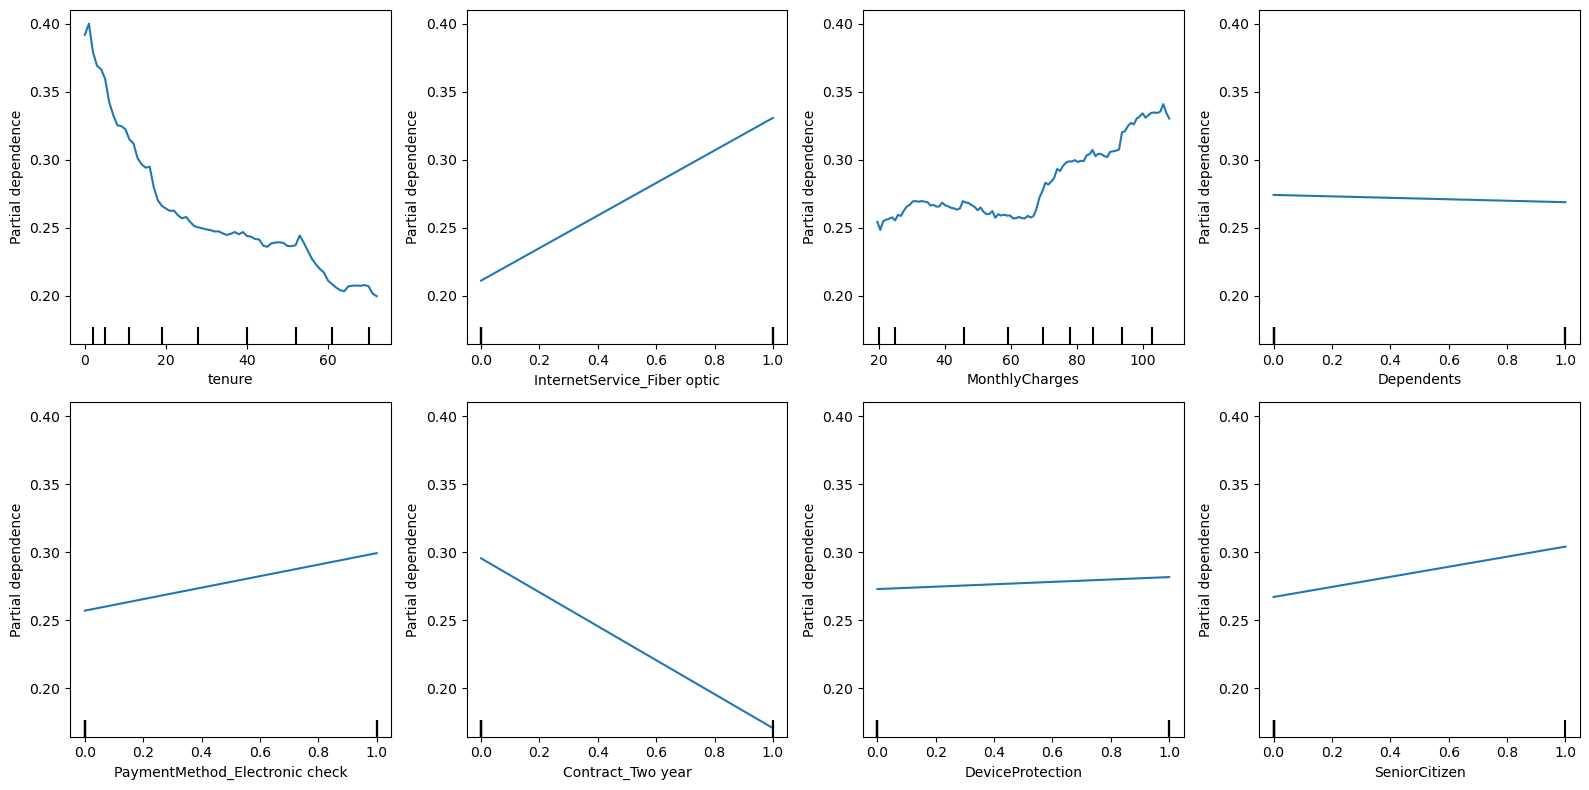

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# ÂÆöÁæ© 8 ÂÄãÈóúÈçµÁâπÂæµ
features = ["tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"]

# Á¢∫‰øù X_test Âè™ÂåÖÂê´Ë®ìÁ∑¥ÊôÇÁöÑÁâπÂæµ
X_test_aligned = X_test[X_train.columns]

# ÂâµÂª∫ PDP ÂúñË°®
fig, ax = plt.subplots(2, 4, figsize=(16, 8))  # 2 Ë°å 4 ÂàóÁöÑÂ≠êÂúñ
ax = ax.flatten()

# Áπ™Ë£Ω PDP
display = PartialDependenceDisplay.from_estimator(rf, X_test_aligned, features, ax=ax)

plt.tight_layout()
plt.show()

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


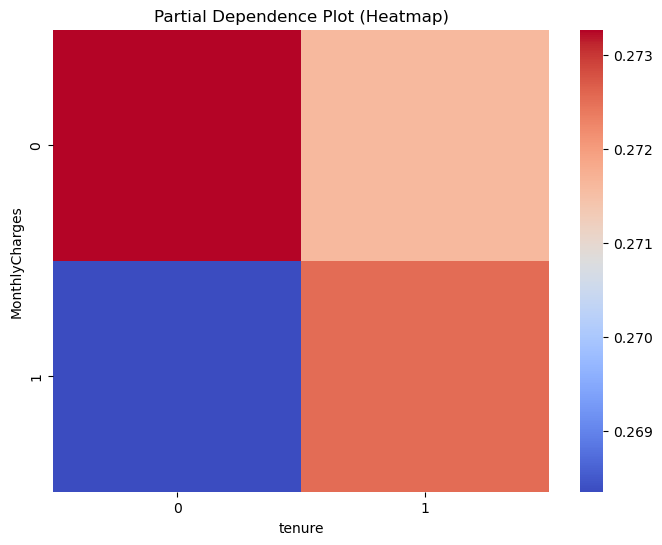

In [31]:
from sklearn.inspection import partial_dependence
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

features_to_analyze = ["tenure", "MonthlyCharges"]

# Ë®àÁÆó PDP
pdp_result = partial_dependence(rf, X_train, features=[(features.index(features_to_analyze[0]), features.index(features_to_analyze[1]))])

# Áπ™Ë£ΩÁÜ±Âúñ
pdp_values = pdp_result["average"].reshape(len(pdp_result["values"][0]), len(pdp_result["values"][1]))

plt.figure(figsize=(8, 6))
sns.heatmap(pdp_values, xticklabels=pdp_result["values"][0], yticklabels=pdp_result["values"][1], cmap="coolwarm", annot=False)
plt.xlabel(features_to_analyze[0])
plt.ylabel(features_to_analyze[1])
plt.title("Partial Dependence Plot (Heatmap)")
plt.show()

In [50]:
#pip install matplotlib-venn

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.8/40.8 kB 3.4 MB/s eta 0:00:00
doneuild dependencies ... 
doneGetting requirements to build wheel ... 
donePreparing metadata (pyproject.toml) ... 
doneng wheel for matplotlib-venn (pyproject.toml) ... 
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=3d4661cccd5411a2fe8fb2e4643fdd6c73c4f934868aeef5f92034f48ec8f2f3
  Stored in directory: /Users/ccit0915/Library/Caches/pip/wheels/c4/16/4a/93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


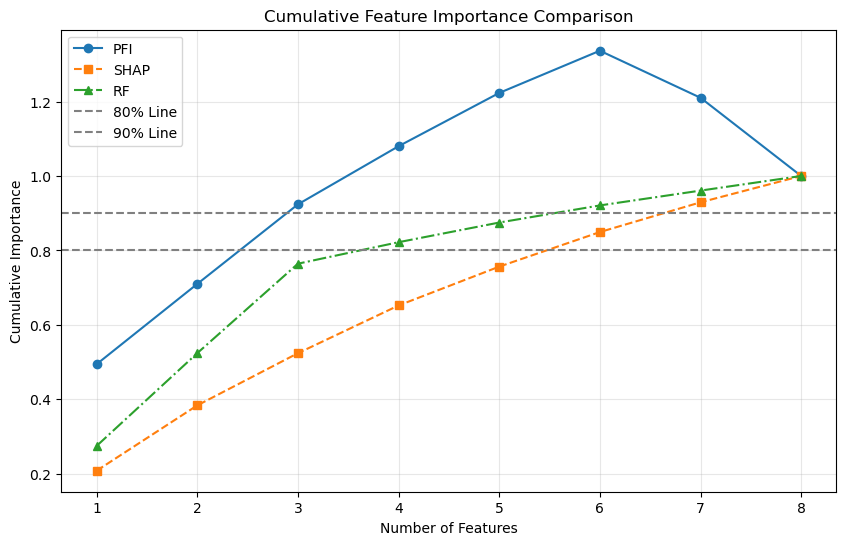

In [326]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Ë®≠ÂÆöÁâπÂæµÂêçÁ®±
feature_names = X_test.columns

# Ë®àÁÆó PFI
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
pfi_importance = dict(zip(feature_names, pfi_result.importances_mean))

# Ë®àÁÆó SHAP ÂÄº
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# ‚úÖ Á¢∫‰øùÊòØ‰∫åÂÖÉÂàÜÈ°ûÔºöshap_values ÊòØ listÔºåÂèñÊ≠£È°ûÂà• (index=1) ÁöÑ SHAP ÂÄº
if isinstance(shap_values, list):  
    shap_values = shap_values[1]  # ÈÅ∏Âèñ SHAP Á¨¨‰∫åÂÄãÈ°ûÂà•ÁöÑ SHAP ÂÄºÔºàÁ¨¨‰∏ÄÂÄãÊòØË≤†È°ûÔºâ

# ‚úÖ ËΩâÊèõ SHAP ÁâπÂæµÈáçË¶ÅÊÄßÁÇ∫ floatÔºåÈÅøÂÖç TypeError
shap_importance = {feature_names[i]: float(np.abs(shap_values[:, i]).mean()) for i in range(len(feature_names))}

# ÂÖßÂª∫ RF ÁâπÂæµÈáçË¶ÅÊÄß
rf_importance = dict(zip(feature_names, rf.feature_importances_))

# ÁâπÂæµÈõÜÂêà
features_PFI = {"tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"}
features_SHAP = {"tenure", "InternetService_Fiber optic", "Contract_Two year",
                 "TotalCharges", "PaymentMethod_Electronic check", "MonthlyCharges",
                 "InternetService_No", "Contract_One year"}
features_RF = {"TotalCharges", "MonthlyCharges", "tenure", "InternetService_Fiber optic",
               "PaymentMethod_Electronic check", "Contract_Two year", "gender", "PaperlessBilling"}

# ÂÆöÁæ©ÂáΩÊï∏ÔºöË®àÁÆóÁ¥ØÁ©çÈáçË¶ÅÊÄß
def get_cumulative_importance(importance_dict, feature_set):
    filtered_importance = {k: v for k, v in importance_dict.items() if k in feature_set}  # üöÄ Âè™ÈÅ∏Êìá feature_set ÂÖßÁöÑÁâπÂæµ
    sorted_importance = dict(sorted(filtered_importance.items(), key=lambda x: x[1], reverse=True))  # ÊéíÂ∫è
    cumulative_importance = np.cumsum(list(sorted_importance.values())) / sum(sorted_importance.values())  # Ë®àÁÆóÁ¥ØÁ©çÊØîÁéá
    return cumulative_importance, list(sorted_importance.keys())

# Ë®àÁÆóÁ¥ØÁ©çÈáçË¶ÅÊÄß
cumulative_PFI, sorted_features_PFI = get_cumulative_importance(pfi_importance, features_PFI)
cumulative_SHAP, sorted_features_SHAP = get_cumulative_importance(shap_importance, features_SHAP)
cumulative_RF, sorted_features_RF = get_cumulative_importance(rf_importance, features_RF)

# Áπ™Ë£ΩÁ¥ØÁ©çÈáçË¶ÅÊÄßÊõ≤Á∑ö
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_PFI) + 1), cumulative_PFI, marker='o', linestyle='-', label='PFI')
plt.plot(range(1, len(cumulative_SHAP) + 1), cumulative_SHAP, marker='s', linestyle='--', label='SHAP')
plt.plot(range(1, len(cumulative_RF) + 1), cumulative_RF, marker='^', linestyle='-.', label='RF')

# Ê∑ªÂä†ÂèÉËÄÉÁ∑ö
plt.axhline(y=0.8, color='gray', linestyle='dashed', label='80% Line')
plt.axhline(y=0.9, color='gray', linestyle='dashed', label='90% Line')
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance Comparison")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

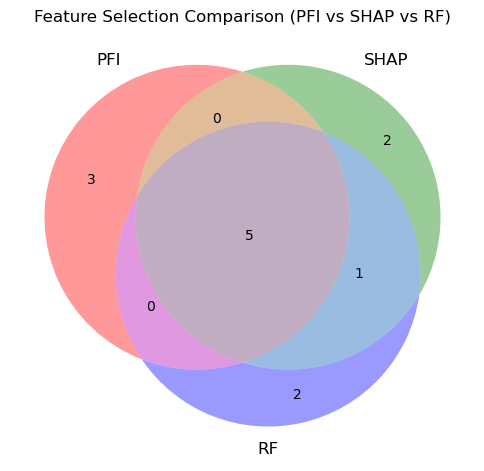

In [327]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# ÂÆöÁæ©‰∏âÁµÑÁâπÂæµ
features_PFI = {"tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"}
features_SHAP = {"tenure", "InternetService_Fiber optic", "Contract_Two year",
                 "TotalCharges", "PaymentMethod_Electronic check", "MonthlyCharges",
                 "InternetService_No", "Contract_One year"}
features_RF = {"TotalCharges", "MonthlyCharges", "tenure", "InternetService_Fiber optic",
               "PaymentMethod_Electronic check", "Contract_Two year", "gender", "PaperlessBilling"}

# Áï´ Venn Âúñ
plt.figure(figsize=(6,6))
venn = venn3([features_PFI, features_SHAP, features_RF], ('PFI', 'SHAP', 'RF'))

# Âä†Ê®ôÈ°å
plt.title("Feature Selection Comparison (PFI vs SHAP vs RF)")

# È°ØÁ§∫ÂúñË°®
plt.show()

In [328]:
core_features = features_PFI & features_SHAP & features_RF
print(core_features)

{'Contract_Two year', 'MonthlyCharges', 'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check'}


In [329]:
# Ë®àÁÆóÂÖ©ÂÖ©‰∫§ÈõÜ
pfi_shap_intersection = (features_PFI & features_SHAP) - core_features
pfi_rf_intersection = (features_PFI & features_RF) - core_features
shap_rf_intersection = (features_SHAP & features_RF) - core_features

# Áµ±‰∏ÄÊî∂ÈõÜÈÄô‰∫õÁâπÂæµ
two_way_intersections = pfi_shap_intersection | pfi_rf_intersection | shap_rf_intersection

# Ëº∏Âá∫ÁµêÊûú
print("‰ªªÊÑèÂÖ©ËÄÖ‰∫§ÈõÜ‰ΩÜ‰∏çÂåÖÂê´Ê†∏ÂøÉÁâπÂæµÁöÑÁâπÂæµ:", two_way_intersections)


‰ªªÊÑèÂÖ©ËÄÖ‰∫§ÈõÜ‰ΩÜ‰∏çÂåÖÂê´Ê†∏ÂøÉÁâπÂæµÁöÑÁâπÂæµ: {'TotalCharges'}


In [330]:
# Ë®àÁÆó‰∏âËÄÖ‰∫§ÈõÜÔºàÊ†∏ÂøÉÁâπÂæµÔºâ
core_features = features_PFI & features_SHAP & features_RF

# Ë®àÁÆó PFI„ÄÅSHAP„ÄÅRF ÂêÑËá™Áç®ÊúâÁöÑÁâπÂæµ
pfi_unique = features_PFI - (features_SHAP | features_RF)
shap_unique = features_SHAP - (features_PFI | features_RF)
rf_unique = features_RF - (features_PFI | features_SHAP)

# Ëº∏Âá∫ÁµêÊûú
print("PFI Áç®ÊúâÁâπÂæµ:", pfi_unique)
print("SHAP Áç®ÊúâÁâπÂæµ:", shap_unique)
print("RF Áç®ÊúâÁâπÂæµ:", rf_unique)

PFI Áç®ÊúâÁâπÂæµ: {'Dependents', 'DeviceProtection', 'SeniorCitizen'}
SHAP Áç®ÊúâÁâπÂæµ: {'Contract_One year', 'InternetService_No'}
RF Áç®ÊúâÁâπÂæµ: {'gender', 'PaperlessBilling'}


In [331]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÂÆöÁæ©‰∏âÁ®ÆÊñπÊ≥ïÁöÑ‰∫§ÈõÜ5ÂÄãÁâπÂæµ+SHAPËàáRFÂÖ±ÂêåÈÅ∏‰∏≠ÁâπÂæµ = 6ÂÄãÁâπÂæµ
selected_features_6 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check', 'TotalCharges'}

# ËÆÄÂèñÊï∏Êìö
X = df[list(selected_features_6)]  # Âè™Âèñ 6 ÂÄãÁâπÂæµ
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂâ≤Êï∏ÊìöÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥Ê®°Âûã
model_6 = RandomForestClassifier(n_estimators=100, random_state=42)
model_6.fit(X_train, y_train)

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = model_6.predict(X_test)

# Ë®àÁÆóÂõõÂÄãË©ï‰º∞ÊåáÊ®ô
accuracy_6 = accuracy_score(y_test, y_pred)
precision_6 = precision_score(y_test, y_pred)
recall_6 = recall_score(y_test, y_pred)
f1_6 = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (6 features) Performance:")
print(f"Accuracy: {accuracy_PFI:.4f}")
print(f"Precision: {precision_PFI:.4f}")
print(f"Recall: {recall_PFI:.4f}")
print(f"F1 Score: {f1_PFI:.4f}")

Reduced Model (6 features) Performance:
Accuracy: 0.7601
Precision: 0.5559
Recall: 0.4665
F1 Score: 0.5073


In [332]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÂÆöÁæ©‰∏âÁ®ÆÊñπÊ≥ïÁöÑ‰∫§ÈõÜ5ÂÄãÁâπÂæµ+SHAPËàáRFÂÖ±ÂêåÈÅ∏‰∏≠ÁâπÂæµ+RFÂñÆÁç®ÁâπÂæµ("SeniorCitizen")= 7ÂÄãÁâπÂæµ
selected_features_7 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check'
                       , 'TotalCharges',"SeniorCitizen" }

# ËÆÄÂèñÊï∏Êìö
X = df[list(selected_features_7)]  # Âè™Âèñ 7 ÂÄãÁâπÂæµ
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂâ≤Êï∏ÊìöÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥Ê®°Âûã
model_7 = RandomForestClassifier(n_estimators=100, random_state=42)
model_7.fit(X_train, y_train)

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = model_7.predict(X_test)

# Ë®àÁÆóÂõõÂÄãË©ï‰º∞ÊåáÊ®ô
accuracy_7 = accuracy_score(y_test, y_pred)
precision_7 = precision_score(y_test, y_pred)
recall_7 = recall_score(y_test, y_pred)
f1_7 = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (7 features) Performance:")
print(f"Accuracy: {accuracy_7:.4f}")
print(f"Precision: {precision_7:.4f}")
print(f"Recall: {recall_7:.4f}")
print(f"F1 Score: {f1_7:.4f}")

Reduced Model (7 features) Performance:
Accuracy: 0.7814
Precision: 0.6019
Recall: 0.5147
F1 Score: 0.5549


In [333]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÂÆöÁæ©‰∏âÁ®ÆÊñπÊ≥ïÁöÑ‰∫§ÈõÜ5ÂÄãÁâπÂæµ+SHAPËàáRFÂÖ±ÂêåÈÅ∏‰∏≠ÁâπÂæµ+RFÂñÆÁç®ÁâπÂæµ("SeniorCitizen")+SHAP Áç®ÊúâÁâπÂæµ(Contract_One year)= 8ÂÄãÁâπÂæµ
selected_features_8 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check'
                       , 'TotalCharges',"SeniorCitizen" , "Contract_One year"}

# ËÆÄÂèñÊï∏Êìö
X = df[list(selected_features_8)]  # Âè™Âèñ 8 ÂÄãÁâπÂæµ
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂâ≤Êï∏ÊìöÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥Ê®°Âûã
model_8 = RandomForestClassifier(n_estimators=100, random_state=42)
model_8.fit(X_train, y_train)

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = model_8.predict(X_test)

# Ë®àÁÆóÂõõÂÄãË©ï‰º∞ÊåáÊ®ô
accuracy_8 = accuracy_score(y_test, y_pred)
precision_8 = precision_score(y_test, y_pred)
recall_8 = recall_score(y_test, y_pred)
f1_8 = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (8 features) Performance:")
print(f"Accuracy: {accuracy_8:.4f}")
print(f"Precision: {precision_8:.4f}")
print(f"Recall: {recall_8:.4f}")
print(f"F1 Score: {f1_8:.4f}")

Reduced Model (8 features) Performance:
Accuracy: 0.7871
Precision: 0.6137
Recall: 0.5282
F1 Score: 0.5677


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


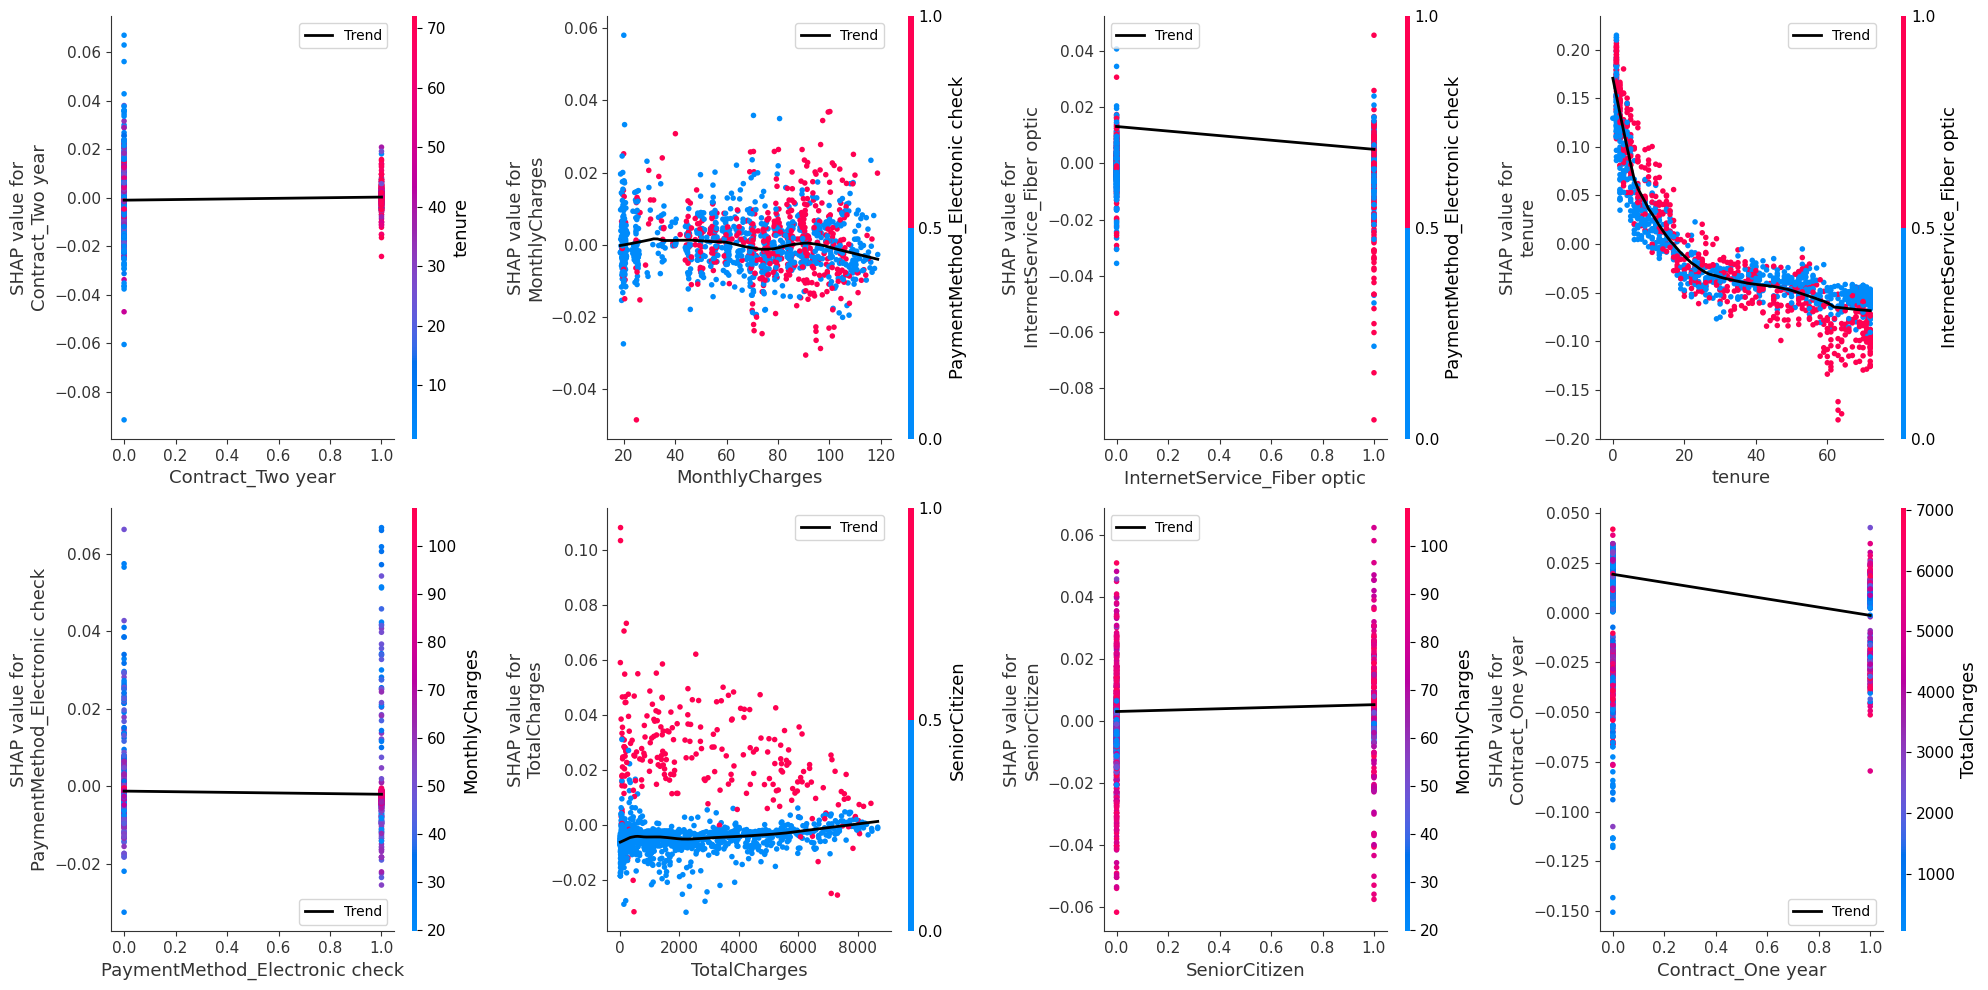

In [340]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  # Áî®Êñº LOESS Êõ≤Á∑öÊì¨Âêà

# **ÁØ©ÈÅ∏Âá∫ 8 ÂÄãÊúÄ‰Ω≥ÁâπÂæµÁöÑ SHAP ÂÄº**
top_features = [
    'Contract_Two year', 'MonthlyCharges', 'InternetService_Fiber optic', 'tenure', 
    'PaymentMethod_Electronic check', 'TotalCharges', "SeniorCitizen", "Contract_One year"
]

# Áç≤Âèñ X_test ‰∏≠ÈÄô‰∫õÁâπÂæµÁöÑÁ¥¢Âºï
feature_indices = [list(X_test.columns).index(feature) for feature in top_features]  

# ÂèñÂæó SHAP ÂÄºÔºàÂ∞çÊáâÈ°ûÂà• 1 ÁöÑÂΩ±ÈüøÔºâ
shap_values_selected = shap_values[:, feature_indices, 1]  
X_test_selected = X_test[top_features]  

# **ÂâµÂª∫ 2x4 Â≠êÂúñ**
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  

# **ÈÄêÂÄãÁπ™Ë£Ω SHAP ‰æùË≥¥Âúñ**
for i, feature in enumerate(top_features):
    ax = axes[i // 4, i % 4]  # Ë®≠ÂÆöÂ≠êÂúñ‰ΩçÁΩÆ
    
    # Áπ™Ë£Ω SHAP ‰æùË≥¥ÂúñÔºà‰∏çËá™ÂãïÈ°ØÁ§∫Ôºâ
    shap.dependence_plot(feature, shap_values_selected, X_test_selected, ax=ax, show=False)
    
    # ÂèñÂæóË©≤ÁâπÂæµÁöÑÊï∏Êìö & SHAP ÂÄº
    feature_values = X_test_selected[feature].values
    shap_values_feature = shap_values_selected[:, i]

    # **Âè™Â∞çÊï∏ÂÄºÂûãËÆäÊï∏Áπ™Ë£Ω LOESS Âπ≥ÊªëÊõ≤Á∑ö**
    if X_test_selected[feature].dtype in [np.float64, np.int64]:
        # LOESS Êì¨Âêà (frac ÊéßÂà∂Âπ≥ÊªëÁ®ãÂ∫¶ÔºåÈÄöÂ∏∏ 0.2~0.3)
        smoothed = sm.nonparametric.lowess(shap_values_feature, feature_values, frac=0.3)
        ax.plot(smoothed[:, 0], smoothed[:, 1], color='black', linewidth=2, label="Trend")

    ax.legend()  # È°ØÁ§∫Âúñ‰æã

plt.tight_layout()  # Ëá™ÂãïË™øÊï¥Â≠êÂúñÈñìË∑ù
plt.show()  # È°ØÁ§∫ÂúñÂÉè

In [280]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÂñÆÁç®‰ª•PFIÁØ©ÈÅ∏ÂæåÁöÑ 8ÂÄãÁâπÂæµ
selected_features_PFI = {"tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"}

# ËÆÄÂèñÊï∏Êìö
X = df[list(selected_features_PFI)]  # PFIÁØ©ÈÅ∏ÂæåÁöÑ 8ÂÄãÁâπÂæµ
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂâ≤Êï∏ÊìöÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥Ê®°Âûã
model_PFI = RandomForestClassifier(n_estimators=100, random_state=42)
model_PFI.fit(X_train, y_train)

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = model_PFI.predict(X_test)

# Ë®àÁÆóÂõõÂÄãË©ï‰º∞ÊåáÊ®ô
accuracy_PFI = accuracy_score(y_test, y_pred)
precision_PFI = precision_score(y_test, y_pred)
recall_PFI = recall_score(y_test, y_pred)
f1_PFI = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (PFI features) Performance:")
print(f"Accuracy: {accuracy_PFI:.4f}")
print(f"Precision: {precision_PFI:.4f}")
print(f"Recall: {recall_PFI:.4f}")
print(f"F1 Score: {f1_PFI:.4f}")

Reduced Model (PFI features) Performance:
Accuracy: 0.7601
Precision: 0.5559
Recall: 0.4665
F1 Score: 0.5073


In [43]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÂñÆÁç®‰ª•SHAPÁØ©ÈÅ∏ÂæåÁöÑ 8ÂÄãÁâπÂæµ
selected_features_SHAP = {"tenure", "InternetService_Fiber optic", "Contract_Two year",
                 "TotalCharges", "PaymentMethod_Electronic check", "MonthlyCharges",
                 "InternetService_No", "Contract_One year"}

# ËÆÄÂèñÊï∏Êìö
X = df[list(selected_features_SHAP)]  # SHAPÁØ©ÈÅ∏ÂæåÁöÑ 8ÂÄãÁâπÂæµ
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂâ≤Êï∏ÊìöÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥Ê®°Âûã
model_SHAP = RandomForestClassifier(n_estimators=100, random_state=42)
model_SHAP.fit(X_train, y_train)

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = model_SHAP.predict(X_test)

# Ë®àÁÆóÂõõÂÄãË©ï‰º∞ÊåáÊ®ô
accuracy_SHAP = accuracy_score(y_test, y_pred)
precision_SHAP = precision_score(y_test, y_pred)
recall_SHAP = recall_score(y_test, y_pred)
f1_SHAP = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (SHAP features) Performance:")
print(f"Accuracy: {accuracy_SHAP:.4f}")
print(f"Precision: {precision_SHAP:.4f}")
print(f"Recall: {recall_SHAP:.4f}")
print(f"F1 Score: {f1_SHAP:.4f}")

Reduced Model (SHAP features) Performance:
Accuracy: 0.7771
Precision: 0.5949
Recall: 0.4960
F1 Score: 0.5409


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ÂñÆÁç®‰ª•RFÁØ©ÈÅ∏ÂæåÁöÑ 8ÂÄãÁâπÂæµ
selected_features_RF = {"TotalCharges", "MonthlyCharges", "tenure", "InternetService_Fiber optic",
               "PaymentMethod_Electronic check", "Contract_Two year", "gender", "PaperlessBilling"}

# ËÆÄÂèñÊï∏Êìö
X = df[list(selected_features_RF)]  # RFÁØ©ÈÅ∏ÂæåÁöÑ 8ÂÄãÁâπÂæµ
y = df['Churn']  # ÁõÆÊ®ôËÆäÊï∏

# ÂàáÂâ≤Êï∏ÊìöÈõÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ë®ìÁ∑¥Ê®°Âûã
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# ÈÄ≤Ë°åÈ†êÊ∏¨
y_pred = model_RF.predict(X_test)

# Ë®àÁÆóÂõõÂÄãË©ï‰º∞ÊåáÊ®ô
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred)
recall_RF = recall_score(y_test, y_pred)
f1_RF = f1_score(y_test, y_pred)

# Ëº∏Âá∫ÁµêÊûú
print(f"Reduced Model (RF features) Performance:")
print(f"Accuracy: {accuracy_RF:.4f}")
print(f"Precision: {precision_RF:.4f}")
print(f"Recall: {recall_RF:.4f}")
print(f"F1 Score: {f1_RF:.4f}")

Reduced Model (RF features) Performance:
Accuracy: 0.7864
Precision: 0.6208
Recall: 0.4960
F1 Score: 0.5514


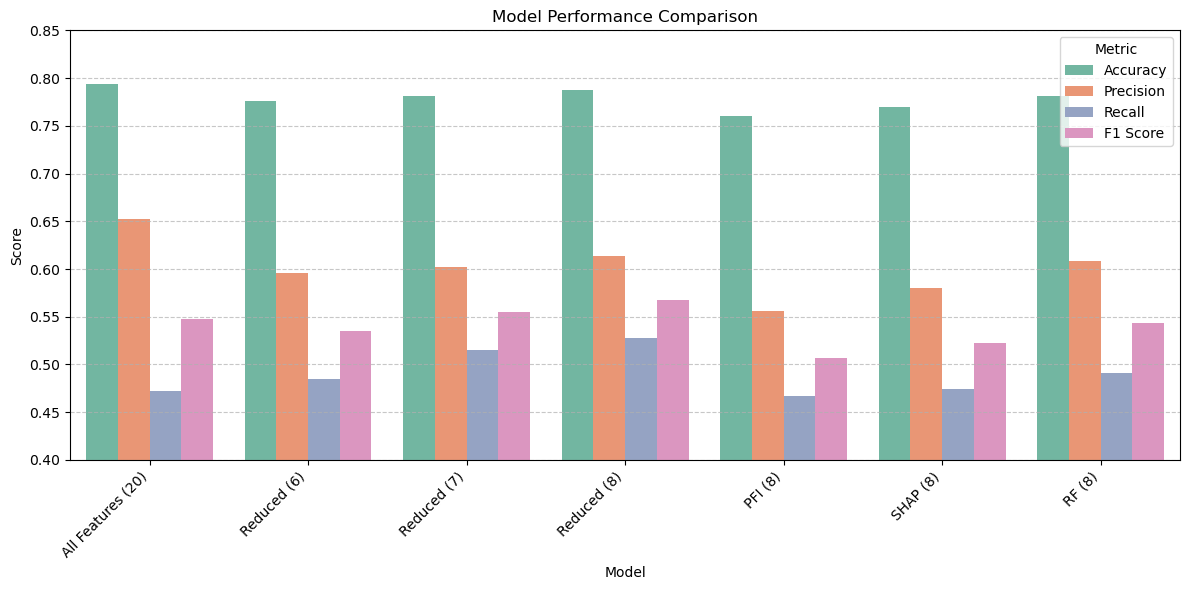

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ÂêÑÊ®°ÂûãÁöÑÊïàËÉΩÊï∏Êìö
models = [
    "All Features (20)",
    "Reduced (6)",
    "Reduced (7)",
    "Reduced (8)",
    "PFI (8)",
    "SHAP (8)",
    "RF (8)"
]

accuracy = [0.7935, 0.7764, 0.7814, 0.7871, 0.7601, 0.7700, 0.7814]
precision = [0.6519, 0.5954, 0.6019, 0.6137, 0.5559, 0.5803, 0.6080]
recall = [0.4718, 0.4853, 0.5147, 0.5282, 0.4665, 0.4745, 0.4906]
f1_score = [0.5474, 0.5347, 0.5549, 0.5677, 0.5073, 0.5221, 0.5430]

# Âª∫Á´ã DataFrame
df = pd.DataFrame({
    "Model": models * 4,
    "Metric": ["Accuracy"] * 7 + ["Precision"] * 7 + ["Recall"] * 7 + ["F1 Score"] * 7,
    "Score": accuracy + precision + recall + f1_score
})

# Áπ™Ë£ΩÊ¢ùÂΩ¢Âúñ
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Model", y="Score", hue="Metric", palette="Set2")

# Ê®ôÈ°åËàáË™øÊï¥
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance Comparison")
plt.ylim(0.4, 0.85)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# È°ØÁ§∫ÂúñË°®
plt.tight_layout()
plt.show()

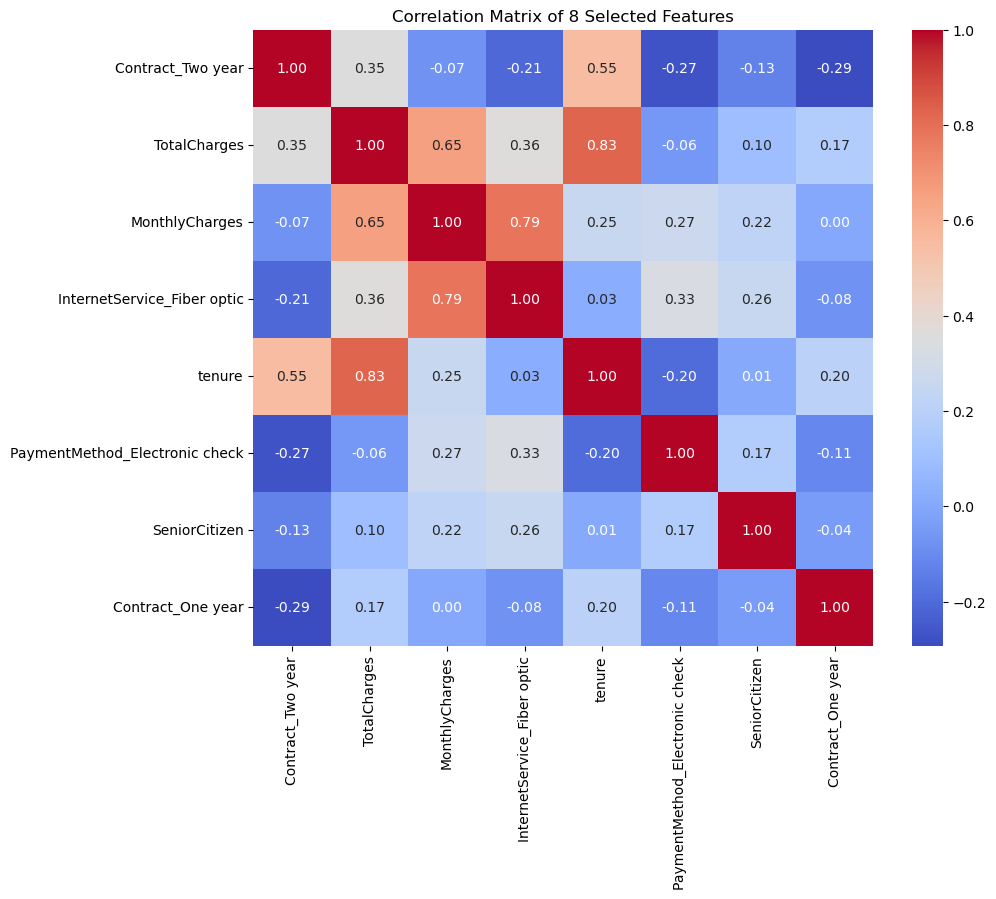

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ë®àÁÆó 8 ÂÄãÁâπÂæµÁöÑÁõ∏Èóú‰øÇÊï∏Áü©Èô£
correlation_matrix = X_train.corr()

# Áï´Âá∫Áõ∏ÈóúÊÄßÁÜ±Âúñ
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of 8 Selected Features")
plt.show()

In [346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)

                          Feature        VIF
0               Contract_Two year   2.970726
1                    TotalCharges   9.244908
2                  MonthlyCharges   9.758854
3     InternetService_Fiber optic   4.815550
4                          tenure  11.800995
5  PaymentMethod_Electronic check   1.878131
6                   SeniorCitizen   1.303897
7               Contract_One year   1.890635


Cross-Validation Results:
Mean CV Accuracy: 0.7725 ¬± 0.0096
Mean CV Precision: 0.5864 ¬± 0.0199
Mean CV Recall: 0.4839 ¬± 0.0390
Mean CV F1 Score: 0.5297 ¬± 0.0291


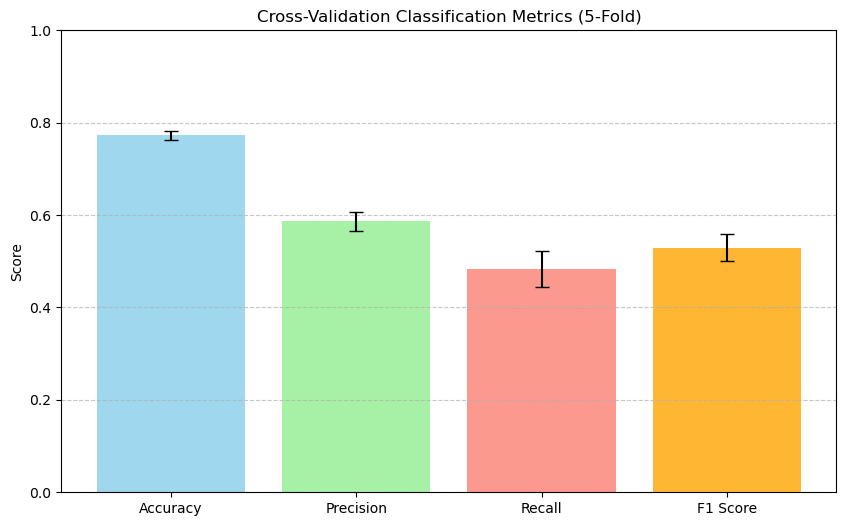

In [277]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# ‰ΩøÁî®‰∫§ÂèâÈ©óË≠âË©ï‰º∞ÂàÜÈ°ûÊåáÊ®ô
cv_accuracy = cross_val_score(
    model_8, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1
)
cv_precision = cross_val_score(
    model_8, X_train, y_train, scoring='precision', cv=5, n_jobs=-1
)
cv_recall = cross_val_score(
    model_8, X_train, y_train, scoring='recall', cv=5, n_jobs=-1
)
cv_f1 = cross_val_score(
    model_8, X_train, y_train, scoring='f1', cv=5, n_jobs=-1
)

# Ë®àÁÆóÂùáÂÄºËàáÊ®ôÊ∫ñÂ∑Æ
print("Cross-Validation Results:")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f} ¬± {np.std(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f} ¬± {np.std(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f} ¬± {np.std(cv_recall):.4f}")
print(f"Mean CV F1 Score: {np.mean(cv_f1):.4f} ¬± {np.std(cv_f1):.4f}")

# Ë¶ñË¶∫Âåñ‰∫§ÂèâÈ©óË≠âÁµêÊûú
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
means = [np.mean(cv_accuracy), np.mean(cv_precision), np.mean(cv_recall), np.mean(cv_f1)]
stds = [np.std(cv_accuracy), np.std(cv_precision), np.std(cv_recall), np.std(cv_f1)]

plt.figure(figsize=(10, 6))
plt.bar(metrics, means, yerr=stds, color=['skyblue', 'lightgreen', 'salmon', 'orange'], alpha=0.8, capsize=5)
plt.ylabel("Score")
plt.title("Cross-Validation Classification Metrics (5-Fold)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

Á∂ìÈÅé‰∏ÄÈÄ£‰∏≤ÁöÑÊ∏¨Ë©¶ÂæåÔºå‰ª•20ÂÄãÂÖ®ÁâπÂæµËº∏ÂÖ•Áï∂‰ΩúBaselineÔºåÊé•Ëëó‰ª•PFI„ÄÅSHAP„ÄÅRFÊ®°ÂûãÊú¨Ë∫´Á≠â‰∏âÊñπÈù¢‰æÜÂ∞çÈáçË¶ÅÁâπÂæµÂÅöÂà§Âà•Ôºå‰∏âÁ®ÆÊñπÂºèÂùáÊúâ‰∫§ÈõÜ‰ª•Âèä‰ªªÊÑèÂÖ©ËÄÖÊúâ‰∫§ÈõÜÔºåÊúÄÂæåÊòØÂñÆÁç®‰∏ÄÁ®ÆÊñπÊ≥ïÁÆóÂá∫‰∏îÁÑ°ËàáÂÖ∂‰ªñÂè¶Â§ñÂÖ©ËÄÖÊúâ‰∫§ÈõÜÔºåÂúñÁ§∫ÂèØË¶ãVeenÂúñ„ÄÇ
‰ª•Á¥ØÁ©çÈáçË¶ÅÊÄßÊõ≤Á∑öÂúñÁÇ∫ÈÅ∏ÊìáÁâπÂæµÊï∏Èáè‰πã‰æùÊìöÔºåÂæóÁü•Ê®°ÂûãÊïàËÉΩËàáÈÅ∏ÊìáÁâπÂæµÊï∏ÈáèÈÅîÊàêÂπ≥Ë°°ÔºåÂèØËÉΩËêΩÂú®6~8ÂÄãÁâπÂæµ‰πãÈñìÔºåÈ¶ñÂÖàÂÖà‰ª•‰∏âÊñπÊ≥ïÂÖ±Âêå‰∫§ÈõÜ‰πã‰∫îÂÄãÊ†∏ÂøÉÁâπÂæµÁÇ∫‰∏ªËª∏ÔºåÂÜç‰æÜÈÅ∏ÊìáÂîØ‰∏Ä‰∏ÄÂÄãË¢´ÂÖ∂‰∏≠ÂÖ©Á®ÆÊñπÊ≥ïÈÅ∏‰∏≠‰πãÁâπÂæµÔºåÁ∏ΩÂÖ±6ÂÄãÁâπÂæµÂÜçÊ¨°ÂØ¶ÊñΩË®ìÁ∑¥ÔºåÊ≠§ÁÇ∫Second Baseline„ÄÇ
‰πãÂæåÈÄêÊ≠•ÊåëÈÅ∏‰ªª‰ΩïÂñÆÁç®‰∏ÄÁ®ÆÊñπÊ≥ïÈÅ∏Âá∫‰πãÁâπÂæµÔºåÁôºÁèæÂ¢ûÂä†"SeniorCitizen"ÈÄôÂÄãÁâπÂæµËÉΩÂ§†ÂÖ®Èù¢Â¢ûÂä†Ê®°ÂûãÊïàËÉΩÔºåÂÖ∂‰ªñÈÉΩ‰∏çË°åÔºåÊ∑ªÂä†Á¨¨7ÂÄãÁâπÂæµÂæåÂÜçÊ¨°ÈÄêÊ≠•Ê∏¨Ë©¶Ê∑ªÂä†Á¨¨8ÂÄãÁâπÂæµÔºåÁôºÁèæÊ∑ªÂä† "Contract_One year"ÈÄôÂÄãÁâπÂæµËÉΩÂ§†ÂÜçÊ¨°ÂÖ®Èù¢ÊèêÂçáÊ®°ÂûãÊïàËÉΩ„ÄÇ
‰πãÂæåÂàÜÂà•ÁÆóÂá∫Ëã•ÊòØ‰ª•PFI„ÄÅSHAP„ÄÅRFÊ®°ÂûãÊú¨Ë∫´Á≠â‰∏âÁ®ÆÊñπÊ≥ïÂñÆÁç®‰æÜÁØ©ÈÅ∏Ââç8ÂÄãÁâπÂæµÔºåËàáÊàëËá™ÂÆöÁæ©‰∏âÁ®ÆÊñπÊ≥ïÊ∑∑ÂêàÁØ©ÈÅ∏ÁâπÂæµÊØîËºÉÔºåË°®ÁèæÂùá‰∏çÂ¶ÇÔºåÂèØË¶ã‰ª•‰∏ä‰∏âÁ®ÆÊñπÊ≥ïÁµêÂêàÁØ©ÈÅ∏ÂæåÔºåÊïàËÉΩÊõ¥ÂÑ™„ÄÇ

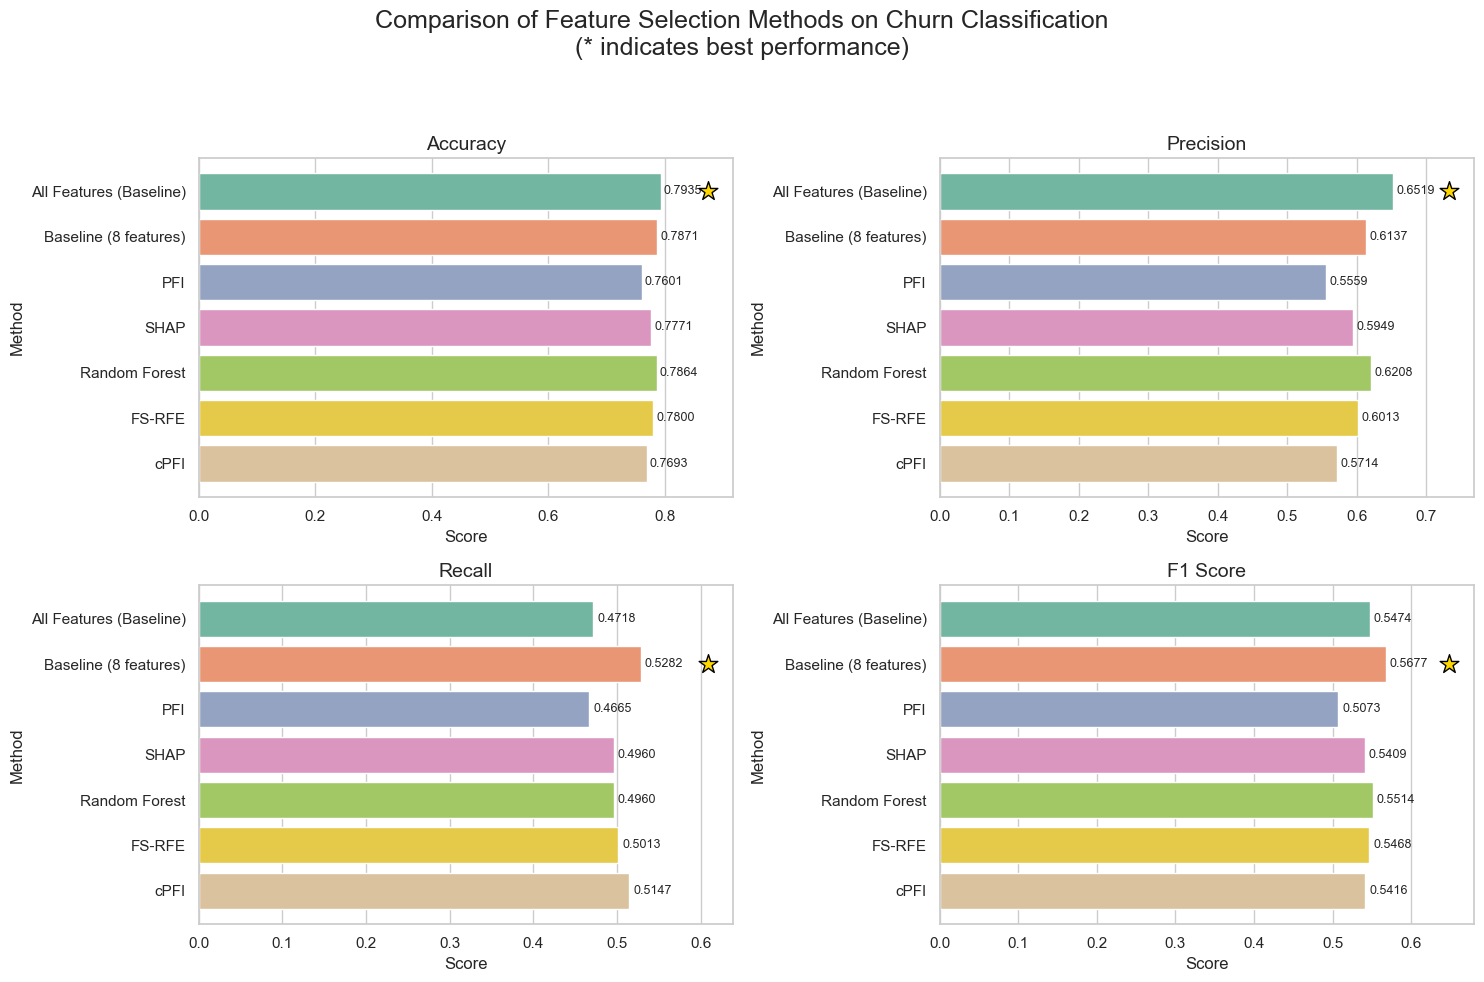

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Âª∫Á´ãË≥áÊñô
data = {
    'Method': [
        'All Features (Baseline)', 'Baseline (8 features)', 
        'PFI', 'SHAP', 'Random Forest', 'FS-RFE', 'cPFI'
    ],
    'Accuracy': [0.7935, 0.7871, 0.7601, 0.7771, 0.7864, 0.7800, 0.7693],
    'Precision': [0.6519, 0.6137, 0.5559, 0.5949, 0.6208, 0.6013, 0.5714],
    'Recall': [0.4718, 0.5282, 0.4665, 0.4960, 0.4960, 0.5013, 0.5147],
    'F1 Score': [0.5474, 0.5677, 0.5073, 0.5409, 0.5514, 0.5468, 0.5416]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Method', var_name='Metric', value_name='Score')

# ÊâæÂá∫ÊØèÂÄãÊåáÊ®ôÁöÑÊúÄ‰Ω≥ÂÄº
best_scores = df_melted.groupby('Metric')['Score'].max().to_dict()


# Áï´Âúñ
sns.set(style="whitegrid")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    metric_df = df_melted[df_melted['Metric'] == metric]
    ax = axes[i]
    bars = sns.barplot(
    data=metric_df, x='Score', y='Method',
    hue='Method',  # ÁÇ∫‰∫ÜÈÖçÂêà palette
    palette='Set2',
    legend=False,  # ‰∏çÈ°ØÁ§∫Âúñ‰æãÔºåÈÅøÂÖçÈáçË§á
    ax=ax
)
    ax.set_title(metric, fontsize=14)

    for j, p in enumerate(ax.patches):
        score = p.get_width()
        method = metric_df.iloc[j]['Method']

        # È°ØÁ§∫Êï∏ÂÄº
        ax.text(score + 0.005, p.get_y() + p.get_height() / 2,
                f'{score:.4f}', va='center', fontsize=9)

        # Â¶ÇÊûúÊòØÊúÄ‰Ω≥ÂÄºÔºåÂä†‰∏äÊòüÊòüÔºàscatter marker='*'Ôºâ
        if round(score, 4) == round(best_scores[metric], 4):
            ax.scatter(score + 0.08, p.get_y() + p.get_height() / 2,
                       color='gold', marker='*', s=200, edgecolor='black', zorder=5)

plt.suptitle('Comparison of Feature Selection Methods on Churn Classification\n(* indicates best performance)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()